# 1.Data Preparation

Importing necessary libraries


In [ ]:
# import data manipulation libraries
import numpy as np
import pandas as pd

# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import drive from google colab for importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset from google drive

olympics_df = pd.read_csv('/content/drive/MyDrive/UM Projects Datasets/B_Olympics Dataset/Summer-Olympic-medals-1976-to-2008_Original.csv',encoding='latin-1')

In [ ]:
# Creating a copy of the original dataset and working on this copied version

olympics = olympics_df.copy()

In [ ]:
# Checking first 10 rows for analysis

olympics.head(10)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
5,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold
9,Montreal,1976.0,Aquatics,Diving,10m platform,"ALEINIK, Vladimir",Men,URS,Soviet Union,M,Bronze


In [ ]:
# Summary of the dataset

print(olympics.info())
print('\n')
olympics.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None




,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316.000000,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,NaN,28,41,293,11337,2,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,817,16,9388,1992,1992,8817,5258
mean,NaN,1993.620789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking total rows and columns

olympics.shape

(15433, 11)

There are 15433 rows and 11 columns.

# 2. Data Cleaning

In [ ]:
# Checking for missing values

olympics.isnull().sum()

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


There are 117 missing values in each column.

In [ ]:
# Dropping rows with missing values

olympics = olympics.dropna()

# Rechecking the data after dropping missing row values
olympics.isnull().sum()

,0
City,0
Year,0
Sport,0
Discipline,0
Event,0
Athlete,0
Gender,0
Country_Code,0
Country,0
Event_gender,0


In [ ]:
# Analysing Gender and Event_gender if they have some actual values

print(olympics.Gender.unique())
print('\n')
print(olympics.Event_gender.unique())


['Women' 'Men']


['W' 'M' 'X']


* In Event_gender column there is a gender type named 'X' which is of no significance in analysis because corresponding to Gender column it does not give any relevant information.

In [ ]:
# Dropping Event_gender

olympics = olympics.drop('Event_gender',axis=1)

# Dropping Country_Code

olympics = olympics.drop('Country_Code',axis=1)

* Dropping Event_gender column as it has no significance in analysis because already there is a column named Gender.

* Dropping Country_Code column because there is another column named Country.

In [ ]:
# Rechecking the data after dropping irrelevant rows and looking for null values

olympics.isnull().sum()

,0
City,0
Year,0
Sport,0
Discipline,0
Event,0
Athlete,0
Gender,0
Country,0
Medal,0


In [ ]:
# Converting Year column from float to integer

olympics['Year'] = olympics['Year'].astype(int)

In [ ]:
# Rechecking the dataset after dropping irrelevant rows and columns

olympics.head(10)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze
5,Montreal,1976,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,United States,Silver
6,Montreal,1976,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,Soviet Union,Gold
7,Montreal,1976,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,United States,Bronze
8,Montreal,1976,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,Italy,Gold
9,Montreal,1976,Aquatics,Diving,10m platform,"ALEINIK, Vladimir",Men,Soviet Union,Bronze


In [ ]:
# Rechecking info after cleaning
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15316 non-null  object
 1   Year        15316 non-null  int64 
 2   Sport       15316 non-null  object
 3   Discipline  15316 non-null  object
 4   Event       15316 non-null  object
 5   Athlete     15316 non-null  object
 6   Gender      15316 non-null  object
 7   Country     15316 non-null  object
 8   Medal       15316 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# Checking total rows and columns after cleaning

olympics.shape

(15316, 9)

* There are 15316 rows and 09 columns.
* Previously there were 15433 rows and 11 columns.

# 3. Exploratory Data Analysis (EDA)

### 3.1 Total Medal Count by Country

In [ ]:
# Total medals won by each country

medals_country = olympics.groupby('Country')['Medal'].count().sort_values(ascending = False)
medals_country

,Medal
Country,
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679
...,...
Sri Lanka,1
Togo,1
United Arab Emirates,1


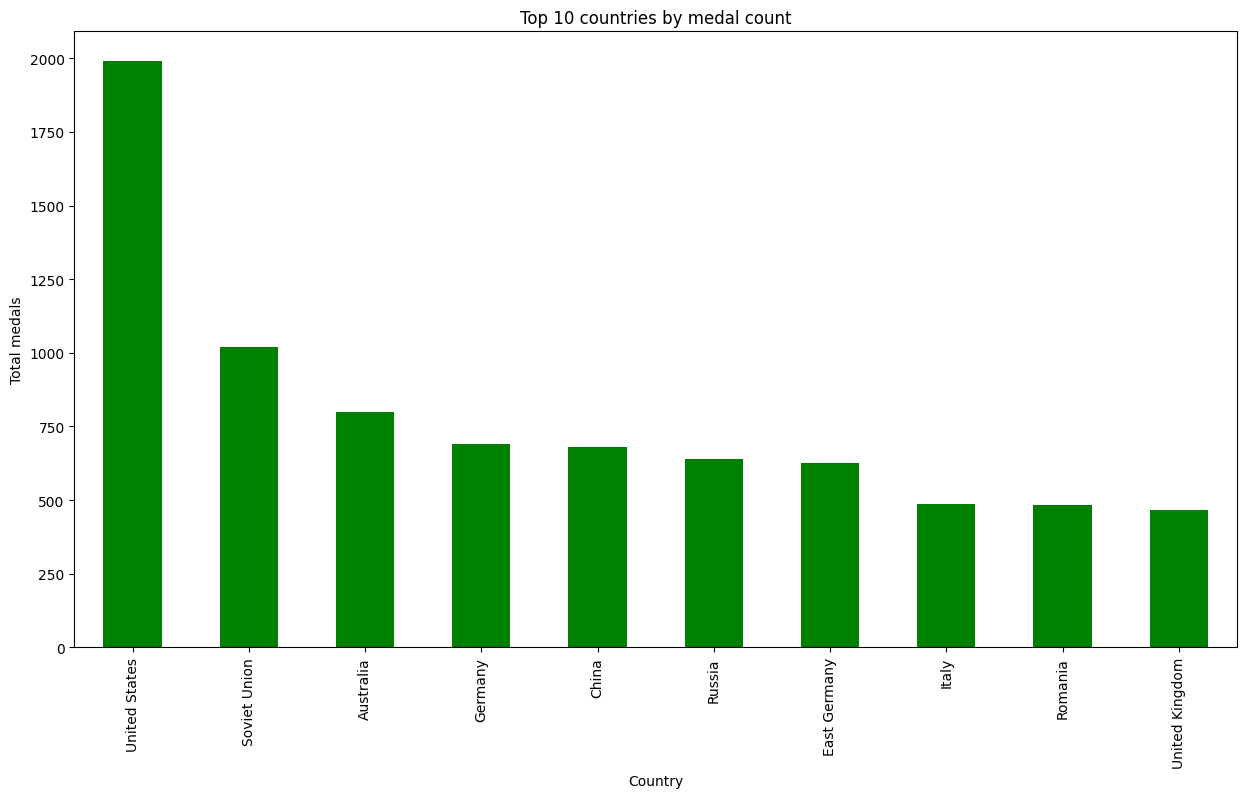

In [ ]:
# Plotting the top 10 countries by total medals

plt.figure(figsize = (15,8))
medals_country.head(10).plot(kind='bar',color='green',)
plt.title('Top 10 countries by medal count')
plt.xlabel('Country')
plt.ylabel('Total medals')
plt.show()

Maximum medals are won by United States(1992) followed by Soviet Union(1021) which is in 2nd position. Both the countries have total medals more than 1000 and rest are below 1000.

### 3.2 Medals Won Over the Years

In [ ]:
## Grouping by Year and counting the medals won

medals_over_years = olympics.groupby('Year')['Medal'].count()
medals_over_years

,Medal
Year,
1976,1305
1980,1387
1984,1459
1988,1546
1992,1705
1996,1859
2000,2015
2004,1998
2008,2042


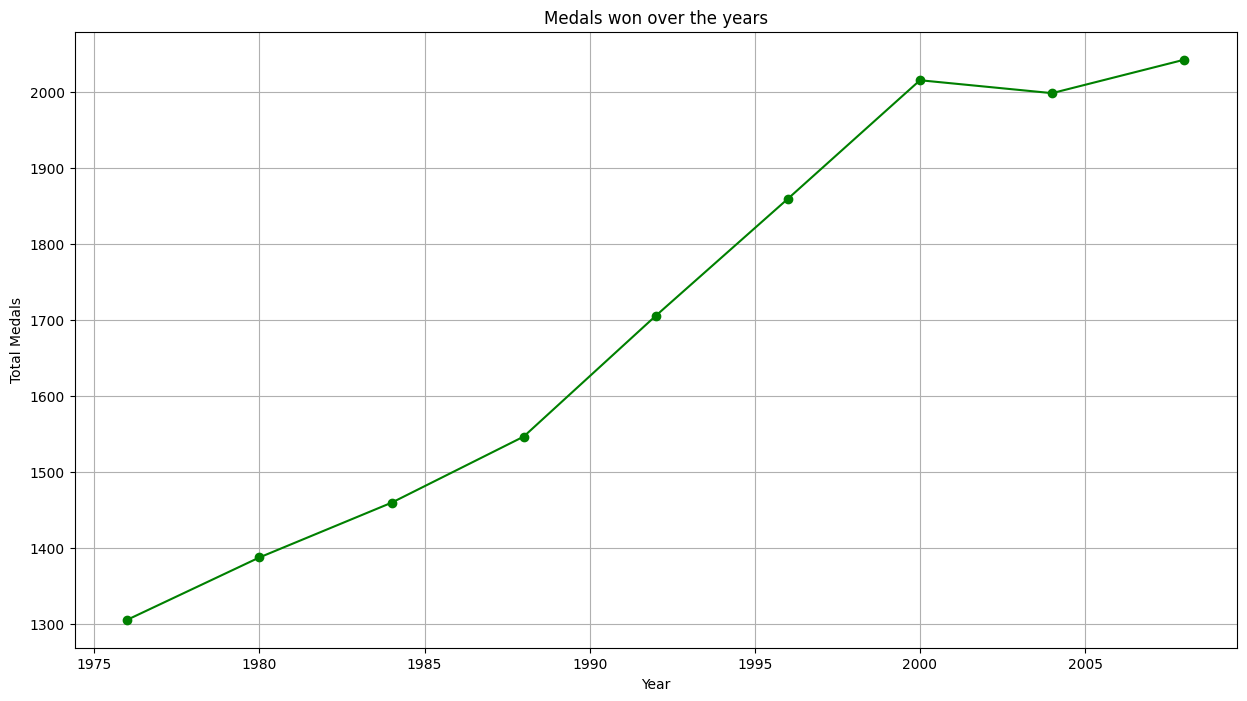

In [ ]:
# Plotting the trend of medals won over the years

plt.figure(figsize=(15, 8))
plt.plot(medals_over_years.index, medals_over_years.values,
marker='o', linestyle='-', color='g')
plt.title("Medals won over the years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

### 3.3 Gender Distribution in Events

In [ ]:
gender_distribution = olympics['Gender'].value_counts()
gender_distribution


,count
Gender,
Men,9388
Women,5928


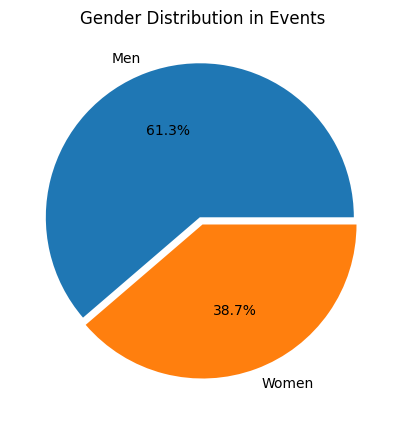

In [ ]:
plt.figure(figsize=(6,5))
plt.pie(gender_distribution, autopct='%1.1f%%',explode=[0.05, 0],labels=gender_distribution.index)
plt.title('Gender Distribution in Events')
plt.show()

From the above pie chart it is found that there are 61% Men and 39% Women participated in the Olympics game.

### 3.4 Top Athletes with Most Medals

In [ ]:
# Analysing athlete with most medals sorted by medals first and then by athlete name

athlete_medals = olympics.groupby('Athlete')['Medal'].count().reset_index(name='Medal_Count').sort_values(by=['Medal_Count', 'Athlete'], ascending=[False, True])[:10]

athlete_medals

,Athlete,Medal_Count
7752,"PHELPS, Michael",16
249,"ANDRIANOV, Nikolay",12
2776,"FISCHER, Birgit",12
7051,"NEMOV, Alexei",12
9884,"THOMPSON, Jenny",12
10019,"TORRES, Dara",12
854,"BIONDI, Matthew",11
1798,"COUGHLIN, Natalie",11
2212,"DITYATIN, Aleksandr",10
3608,"HALL, Gary Jr.",10


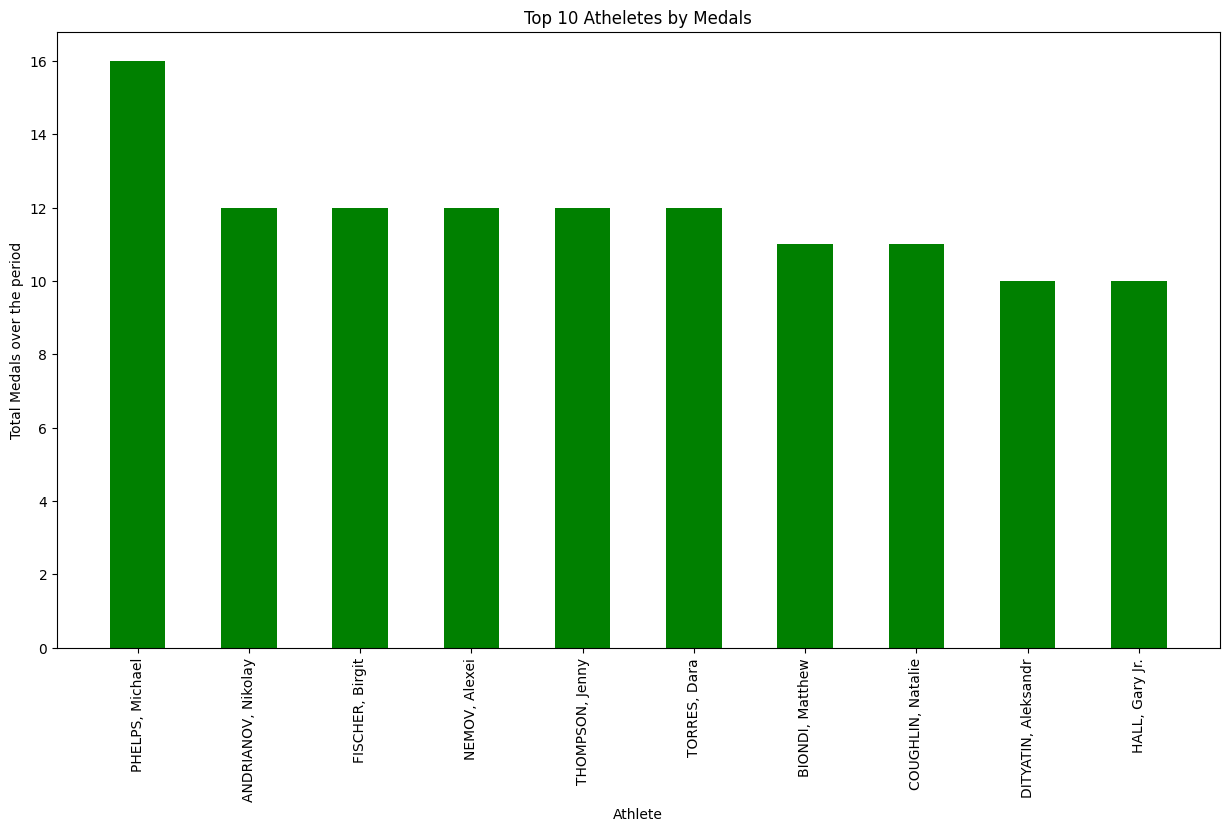

In [ ]:
# Plotting top 10 athletes according to medals
plt.figure(figsize=(15,8))
plt.bar(x=athlete_medals['Athlete'],height=athlete_medals['Medal_Count'],width=0.5,color='green')
plt.title('Top 10 Atheletes by Medals')
plt.xlabel('Athlete')
plt.ylabel('Total Medals over the period')
plt.xticks(rotation=90)
plt.show()

* Michael Phelps won 16 medals from 1976 to 2008.

### 3.5 City hosted maximum number of olympics

In [ ]:
# City hosted olympics and its respective year

city_hosted = olympics[["City", 'Year']]
city_hosted

,City,Year
0,Montreal,1976
1,Montreal,1976
2,Montreal,1976
3,Montreal,1976
4,Montreal,1976
...,...,...
15428,Beijing,2008
15429,Beijing,2008
15430,Beijing,2008
15431,Beijing,2008


In [ ]:
# Dropping duplicate years to get the only year of the city hosted

city_hosted=city_hosted.drop_duplicates('Year')
city_hosted

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992
7519,Atlanta,1996
9378,Sydney,2000
11393,Athens,2004
13391,Beijing,2008


In [ ]:
# Number of times city hosted olympics

num_times_hosted = city_hosted['City'].value_counts()
num_times_hosted

,count
City,
Montreal,1
Moscow,1
Los Angeles,1
Seoul,1
Barcelona,1
Atlanta,1
Sydney,1
Athens,1
Beijing,1


* No city hosted olympics twice since 1976.

### 3.6 City hosted most events

In [ ]:
# Analysing city with most events

city_events=olympics['City'].value_counts()
city_events

,count
City,
Beijing,2042
Sydney,2015
Athens,1998
Atlanta,1859
Barcelona,1705
Seoul,1546
Los Angeles,1459
Moscow,1387
Montreal,1305


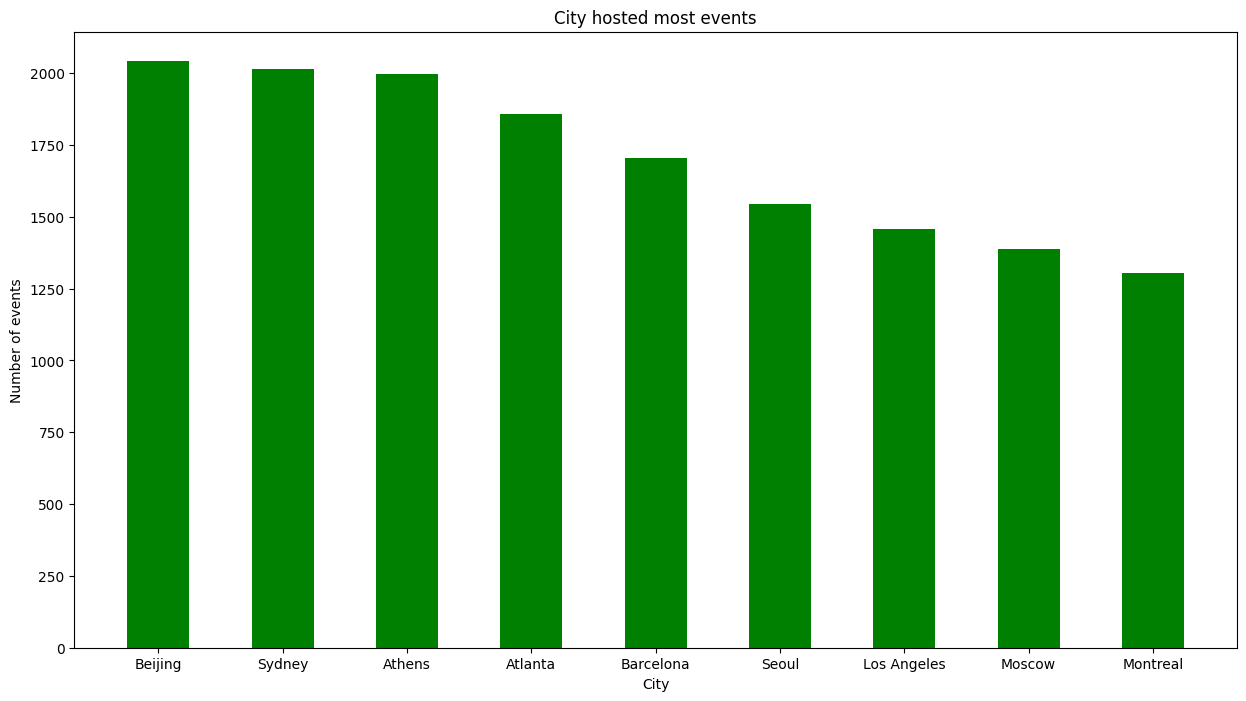

In [ ]:
# Plotting city with most hosted events

plt.figure(figsize=(15,8))
plt.bar(city_events.index,city_events.values,width=0.5,color='green')
plt.title('City hosted most events')
plt.xlabel('City')
plt.ylabel('Number of events')
plt.show()

* Beijing has hosted most number of events since 1976 till 2008 followed by Sydney an Athens.

### 3.7 Understanding the events itself

In [ ]:
# Looking for each unique sports,discipline and event

olympics[['Sport','Discipline','Event']].nunique()

,0
Sport,28
Discipline,41
Event,293


* There are 28 different types of Sports
* There are 41 different types of disciplines
* There are 293 different types of events

In [ ]:
# Looking for total unique comnbinations of sports,its discipline and its event that are being played

all_sports=olympics[['Sport','Discipline','Event']].value_counts()
all_sports

Sport       Discipline       Event     
Hockey      Hockey           hockey        817
Handball    Handball         handball      780
Football    Football         football      669
Volleyball  Volleyball       volleyball    647
Basketball  Basketball       basketball    646
                                          ... 
Wrestling   Wrestling Free.  54 - 58kg       3
                             58 - 63kg       3
                             63 - 69kg       3
            Wrestling Gre-R  85 - 97kg       3
                             97 - 130kg      3
Name: count, Length: 334, dtype: int64

* There are 334 unique combinations of sports that are being played

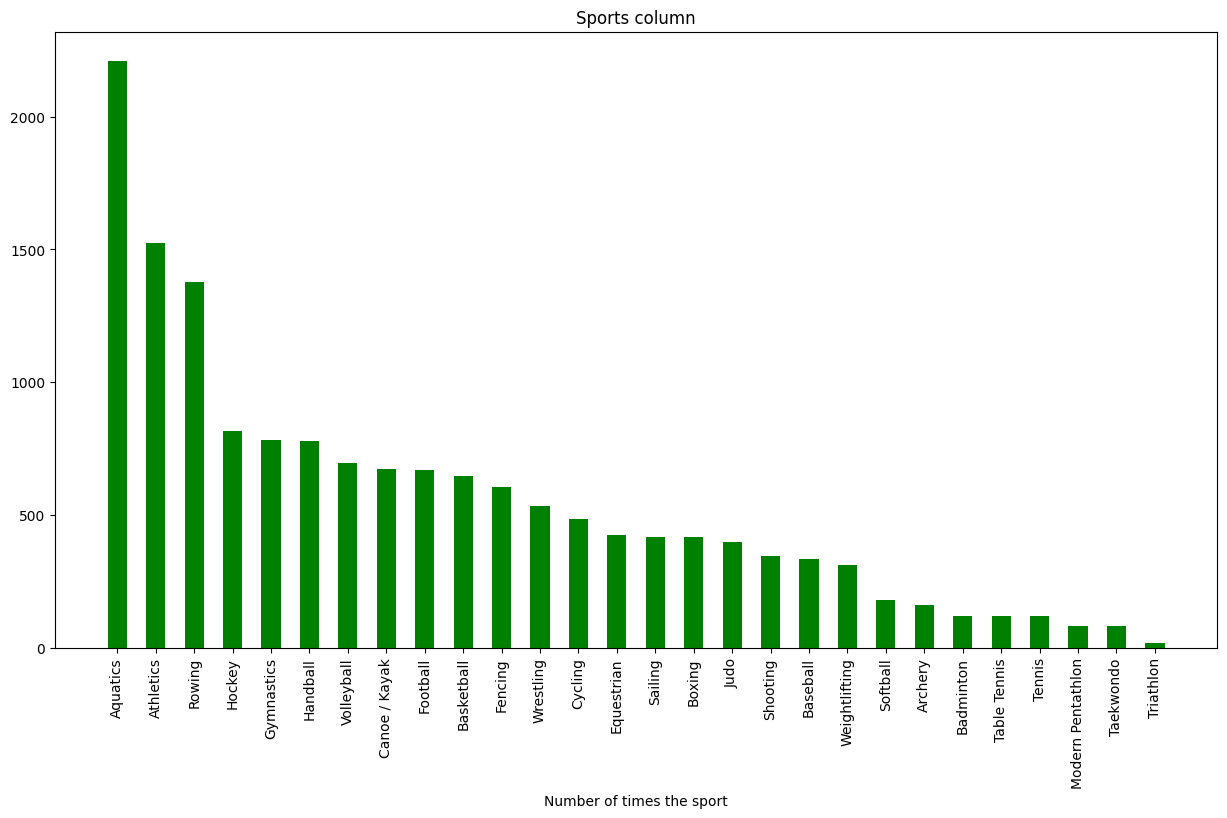

In [ ]:
# Plotting Sports column for unique values

sports_plot=olympics['Sport'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(15,8))
plt.bar(sports_plot.index,sports_plot.values,width=0.5,color='green')
plt.title('Sports column')
plt.xlabel('Sports')
plt.xlabel('Number of times the sport')
plt.xticks(rotation=90)
plt.show()

* Top 3 most played sport are Aquatic,Athletics and Rowing having Aquatics being the most played sport.
* Bottom 3 least played sport are Modern Pentathlon,Taekwondo and Triathlon having Triathlon being the  least played sport.

* Michael Phelps won 16 medals from 1976 to 2008.

### 3.8 Gender ratio

In [ ]:
# Total participants per gender
participant = olympics.groupby('Gender')['Gender'].count()

# Total medals won per gender
medals_won = olympics.groupby('Gender')['Medal'].count()

In [ ]:
# Participants and their total medals

gender_participants = pd.DataFrame({'Total Participant':participant,'Total Medals':medals_won})
gender_participants

,Total Participant,Total Medals
Gender,,
Men,9388,9388
Women,5928,5928


* 9388 males participated and all have won medals.
* 5928 females participated and all have won medals too.

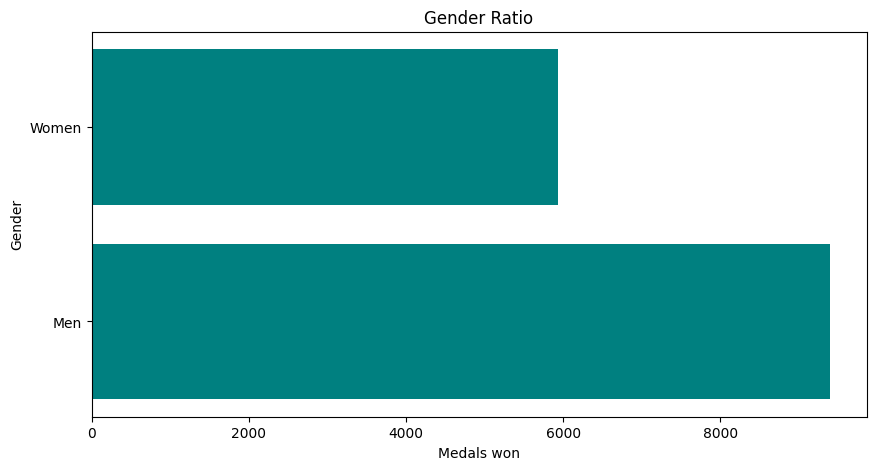

In [ ]:
# Plotting the gender with medals

plt.figure(figsize=(10,5))
plt.barh(gender_participants.index,gender_participants['Total Medals'],color='teal')
plt.title('Gender Ratio')
plt.xlabel('Medals won')
plt.ylabel('Gender')
plt.show()

* Here it is evident that there are some sports where females are not participating or the game is not meant for them.

### 3.9 Country has won most medal and how many in each year

In [ ]:
# Analysing Year,Country and Medal column from Olympics table for faster process

medal_each_year = olympics[['Year','Country','Medal']]
medal_each_year

,Year,Country,Medal
0,1976,East Germany,Silver
1,1976,Soviet Union,Bronze
2,1976,United States,Gold
3,1976,Italy,Silver
4,1976,United States,Bronze
...,...,...,...
15428,2008,France,Bronze
15429,2008,Georgia,Gold
15430,2008,Azerbaijan,Silver
15431,2008,France,Gold


In [ ]:
# Grouping Year,Country and Medal column to get medals won by each country

medal_each_year= medal_each_year.groupby(['Year','Country','Medal'])['Country'].count().reset_index(name='Count')
medal_each_year

,Year,Country,Medal,Count
0,1976,Australia,Bronze,8
1,1976,Australia,Silver,16
2,1976,Austria,Bronze,1
3,1976,Belgium,Bronze,6
4,1976,Belgium,Silver,3
...,...,...,...,...
1210,2008,Uzbekistan,Silver,2
1211,2008,Venezuela,Bronze,1
1212,2008,Vietnam,Silver,1
1213,2008,Zimbabwe,Gold,1


In [ ]:
# Converting Medal column into a categorical column

medal_each_year['Medal'] = pd.Categorical(medal_each_year['Medal'],categories=['Gold','Silver','Bronze'],ordered=True)
medal_each_year

,Year,Country,Medal,Count
0,1976,Australia,Bronze,8
1,1976,Australia,Silver,16
2,1976,Austria,Bronze,1
3,1976,Belgium,Bronze,6
4,1976,Belgium,Silver,3
...,...,...,...,...
1210,2008,Uzbekistan,Silver,2
1211,2008,Venezuela,Bronze,1
1212,2008,Vietnam,Silver,1
1213,2008,Zimbabwe,Gold,1


In [ ]:
# Sorting values of Year,Medal,Count in ascending order

medal_each_year= medal_each_year.sort_values(ascending=[True,True,True],by=['Year','Medal','Count'])
medal_each_year

,Year,Country,Medal,Count
36,1976,Jamaica,Gold,1
41,1976,"Korea, North",Gold,1
44,1976,"Korea, South",Gold,1
47,1976,Mexico,Gold,1
72,1976,Switzerland,Gold,1
...,...,...,...,...
1091,2008,Germany,Bronze,43
1167,2008,Russia,Bronze,56
1059,2008,China,Bronze,57
1033,2008,Australia,Bronze,76


In [ ]:
medal_each_year=medal_each_year.pivot(index=['Year','Country'],columns=['Medal'],values=['Count'])
medal_each_year

Count              
Medal                Gold Silver Bronze
Year Country                           
1976 Australia        NaN   16.0    8.0
     Austria          NaN    NaN    1.0
     Belgium          NaN    3.0    6.0
     Bermuda*         NaN    NaN    1.0
     Brazil           NaN    NaN    3.0
...                   ...    ...    ...
2008 United States  125.0  109.0   81.0
     Uzbekistan       1.0    2.0    3.0
     Venezuela        NaN    NaN    1.0
     Vietnam          NaN    1.0    NaN
     Zimbabwe         1.0    3.0    NaN

[559 rows x 3 columns]

In [ ]:
# Resetting index of Year column

medal_each_year=medal_each_year.reset_index()
medal_each_year

Year        Country  Count              
Medal                        Gold Silver Bronze
0      1976      Australia    NaN   16.0    8.0
1      1976        Austria    NaN    NaN    1.0
2      1976        Belgium    NaN    3.0    6.0
3      1976       Bermuda*    NaN    NaN    1.0
4      1976         Brazil    NaN    NaN    3.0
..      ...            ...    ...    ...    ...
554    2008  United States  125.0  109.0   81.0
555    2008     Uzbekistan    1.0    2.0    3.0
556    2008      Venezuela    NaN    NaN    1.0
557    2008        Vietnam    NaN    1.0    NaN
558    2008       Zimbabwe    1.0    3.0    NaN

[559 rows x 5 columns]

In [ ]:
# Repalcing NaN values with 0

medal_each_year = medal_each_year.replace(np.nan,0)
medal_each_year

Year        Country  Count              
Medal                        Gold Silver Bronze
0      1976      Australia    0.0   16.0    8.0
1      1976        Austria    0.0    0.0    1.0
2      1976        Belgium    0.0    3.0    6.0
3      1976       Bermuda*    0.0    0.0    1.0
4      1976         Brazil    0.0    0.0    3.0
..      ...            ...    ...    ...    ...
554    2008  United States  125.0  109.0   81.0
555    2008     Uzbekistan    1.0    2.0    3.0
556    2008      Venezuela    0.0    0.0    1.0
557    2008        Vietnam    0.0    1.0    0.0
558    2008       Zimbabwe    1.0    3.0    0.0

[559 rows x 5 columns]

In [ ]:
# Calculating total medals won

medal_each_year['Total Medals']=medal_each_year['Count','Bronze']+medal_each_year['Count','Gold']+medal_each_year['Count','Silver']
medal_each_year

Year        Country  Count               Total Medals
Medal                        Gold Silver Bronze             
0      1976      Australia    0.0   16.0    8.0         24.0
1      1976        Austria    0.0    0.0    1.0          1.0
2      1976        Belgium    0.0    3.0    6.0          9.0
3      1976       Bermuda*    0.0    0.0    1.0          1.0
4      1976         Brazil    0.0    0.0    3.0          3.0
..      ...            ...    ...    ...    ...          ...
554    2008  United States  125.0  109.0   81.0        315.0
555    2008     Uzbekistan    1.0    2.0    3.0          6.0
556    2008      Venezuela    0.0    0.0    1.0          1.0
557    2008        Vietnam    0.0    1.0    0.0          1.0
558    2008       Zimbabwe    1.0    3.0    0.0          4.0

[559 rows x 6 columns]

In [ ]:
# Sorting according to year and total medals

medal_each_year =medal_each_year.sort_values(ascending = [True,False],by=['Year','Total Medals'])
medal_each_year

Year        Country  Count               Total Medals
Medal                        Gold Silver Bronze             
30     1976   Soviet Union  113.0   93.0   79.0        285.0
10     1976   East Germany   99.0   51.0   42.0        192.0
37     1976  United States   63.0   56.0   36.0        155.0
39     1976   West Germany   21.0   24.0   30.0         75.0
26     1976         Poland   18.0   29.0   26.0         73.0
..      ...            ...    ...    ...    ...          ...
542    2008          Sudan    0.0    1.0    0.0          1.0
548    2008           Togo    0.0    0.0    1.0          1.0
550    2008        Tunisia    1.0    0.0    0.0          1.0
556    2008      Venezuela    0.0    0.0    1.0          1.0
557    2008        Vietnam    0.0    1.0    0.0          1.0

[559 rows x 6 columns]

In [ ]:
# Dropping columns of first level

medal_each_year.columns=medal_each_year.columns.droplevel(0)
medal_each_year

Medal,,,Gold,Silver,Bronze,
30,1976,Soviet Union,113.0,93.0,79.0,285.0
10,1976,East Germany,99.0,51.0,42.0,192.0
37,1976,United States,63.0,56.0,36.0,155.0
39,1976,West Germany,21.0,24.0,30.0,75.0
26,1976,Poland,18.0,29.0,26.0,73.0
...,...,...,...,...,...,...
542,2008,Sudan,0.0,1.0,0.0,1.0
548,2008,Togo,0.0,0.0,1.0,1.0
550,2008,Tunisia,1.0,0.0,0.0,1.0
556,2008,Venezuela,0.0,0.0,1.0,1.0


In [ ]:
# Renaming the columns for cleaner columns

medal_each_year.columns = ['Year','Country','Gold','Silver','Bronze','Total Medals']
medal_each_year

,Year,Country,Gold,Silver,Bronze,Total Medals
30,1976,Soviet Union,113.0,93.0,79.0,285.0
10,1976,East Germany,99.0,51.0,42.0,192.0
37,1976,United States,63.0,56.0,36.0,155.0
39,1976,West Germany,21.0,24.0,30.0,75.0
26,1976,Poland,18.0,29.0,26.0,73.0
...,...,...,...,...,...,...
542,2008,Sudan,0.0,1.0,0.0,1.0
548,2008,Togo,0.0,0.0,1.0,1.0
550,2008,Tunisia,1.0,0.0,0.0,1.0
556,2008,Venezuela,0.0,0.0,1.0,1.0


* In 1976 Soviet Union won 285 medals in total follwed by Germany with 192 medals.

### 3.10 Which country has dominated any particular sport

In [ ]:
# Grouping Sport and country into a dataframe for faster process

sport_dominancy = olympics.groupby(['Sport','Country'])['Country'].count().reset_index(name='Count')
sport_dominancy

,Sport,Country,Count
0,Aquatics,Argentina,1
1,Aquatics,Australia,239
2,Aquatics,Austria,3
3,Aquatics,Belgium,2
4,Aquatics,Brazil,15
...,...,...,...
823,Wrestling,United Kingdom,1
824,Wrestling,United States,57
825,Wrestling,Uzbekistan,6
826,Wrestling,West Germany,6


In [ ]:
# Sorting the dataframe

sport_dominancy = sport_dominancy.sort_values(ascending= [True,False],by=['Sport','Count'])
sport_dominancy

,Sport,Country,Count
43,Aquatics,United States,578
1,Aquatics,Australia,239
28,Aquatics,Russia,125
7,Aquatics,China,118
12,Aquatics,East Germany,109
...,...,...,...
814,Wrestling,Slovakia,1
817,Wrestling,Switzerland,1
818,Wrestling,Syria,1
819,Wrestling,Tajikistan,1


In [ ]:
# Analysing the unique values

sport_dominancy['Sport'].unique()


array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

In [ ]:
# Searching the specific sport for medal counts

p = 'Archery'

try:
  p=input('Enter a sport from the above : ')
except:
  print('Invalid input')

temp = sport_dominancy[sport_dominancy['Sport']==p]
temp

Enter a sport from the above : Mishri


,Sport,Country,Count


* Here we can check which sports was dominated by countries.


### 3.11 Athlete changed his or her Event or Discipline or sport and still won medals

In [ ]:
# Creating dataframe of athlete and sport for faster processing

athlete = olympics[['Athlete','Sport']]
athlete

,Athlete,Sport
0,"KÖHLER, Christa",Aquatics
1,"KOSENKOV, Aleksandr",Aquatics
2,"BOGGS, Philip George",Aquatics
3,"CAGNOTTO, Giorgio Franco",Aquatics
4,"WILSON, Deborah Keplar",Aquatics
...,...,...
15428,"GUENOT, Christophe",Wrestling
15429,"KVIRKELIA, Manuchar",Wrestling
15430,"RAHIMOV, Vitaliy",Wrestling
15431,"GUENOT, Steeve",Wrestling


In [ ]:
# Dropping duplicates

athlete = athlete.drop_duplicates()
athlete

,Athlete,Sport
0,"KÖHLER, Christa",Aquatics
1,"KOSENKOV, Aleksandr",Aquatics
2,"BOGGS, Philip George",Aquatics
3,"CAGNOTTO, Giorgio Franco",Aquatics
4,"WILSON, Deborah Keplar",Aquatics
...,...,...
15428,"GUENOT, Christophe",Wrestling
15429,"KVIRKELIA, Manuchar",Wrestling
15430,"RAHIMOV, Vitaliy",Wrestling
15431,"GUENOT, Steeve",Wrestling


In [ ]:
# Grouping athletes

athlete=athlete.groupby(['Athlete'])
athlete

In [ ]:
# Analysing athletes who changed their sport and still won

for k,v in athlete:
  if len(v['Sport'].tolist()) >1:
    print(k,v['Sport'].tolist())

('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']


* There are some players who changed their sport and won a medal.
* There is a possibility that 2 different players with same name and sports. Here cannot distinguish.

In [ ]:
olympics[:10]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze
5,Montreal,1976,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,United States,Silver
6,Montreal,1976,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,Soviet Union,Gold
7,Montreal,1976,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,United States,Bronze
8,Montreal,1976,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,Italy,Gold
9,Montreal,1976,Aquatics,Diving,10m platform,"ALEINIK, Vladimir",Men,Soviet Union,Bronze
